# PCA

Below we give a simple piece of code in order to compute a PCA in 2 dimensions for digits (using the scikit-learn library).

In [1]:
import numpy as np
import sklearn.datasets as ds
import os
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.cm as plt_cm
import matplotlib.colors as plt_col
np.random.seed(0)

In [2]:
def plot_digits(x, classes, ax=None):
    xx = x[0,:]
    yy = x[1,:]
    width = np.max(xx) - np.min(xx)
    height = np.max(yy) - np.min(yy)
    ax = plt.gca() if ax is None else ax
    ax.set_xlim([np.min(xx) - 0.1 * width, np.max(xx) + 0.1 * width])
    ax.set_ylim([np.min(yy) - 0.1 * height, np.max(yy) + 0.1 * height])
    cmap = plt_cm.jet
    norm = plt_col.Normalize(vmin=0, vmax=9)
    mapper = plt_cm.ScalarMappable(cmap=cmap, norm=norm)
    colors = mapper.to_rgba(range(10))
    for x1, x2, digit in zip(xx, yy, classes):
        ax.text(x1, x2, digit, color=colors[int(digit)])

In [3]:
np.random.seed(0)
digits = ds.load_digits()
digits_i = np.random.choice(range(digits.data.shape[0]), 500)
digits_x = np.transpose(digits.data[digits_i, :])
digits_classes = digits.target[digits_i]

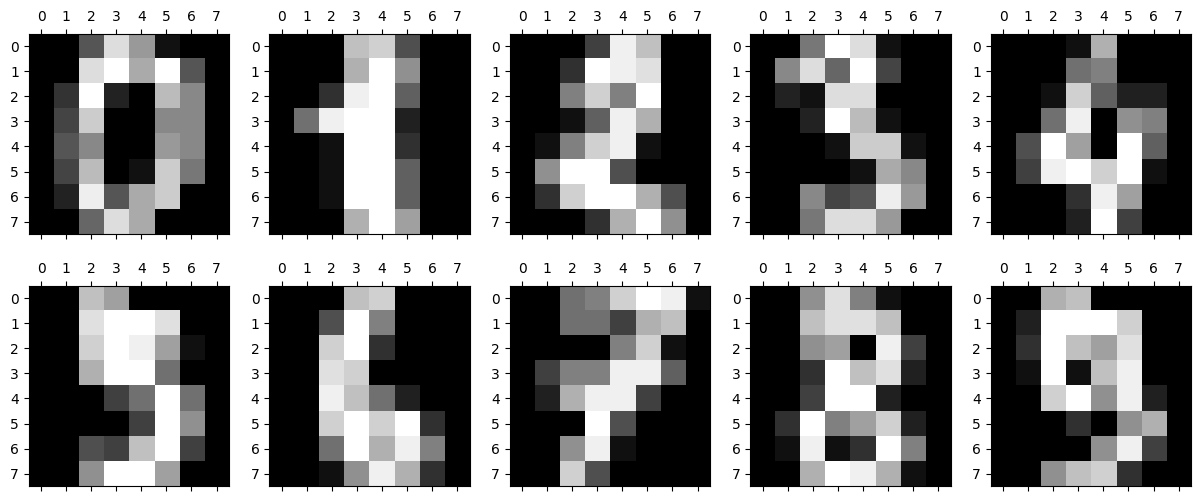

In [4]:
fig, ax = plt.subplots(nrows=2, ncols=5, figsize=[15, 6])
ax = ax.flatten()
for i in range(10):
    ax[i].matshow(digits.images[i], cmap=plt_cm.gray)

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_r = pca.fit(digits_x.T).transform(digits_x.T)

In [6]:
digits_x.shape

(64, 500)

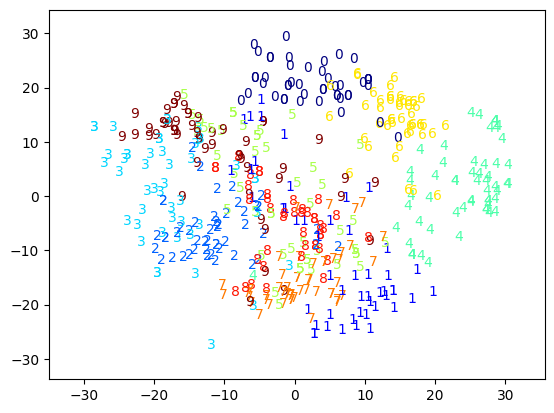

In [7]:
plot_digits(x_r.T,digits_classes)

# Probabilisitic PCA


Probabilsitic PCA is simple linear-Gaussian framework defined by a matrix $W\in \mathbb{R}^{d\times q}$, a vector $\mu\in \mathbb{R}^d$ and a noise parameter $\sigma^2>0$ such that the observed variable $x$ is modeled as:
\begin{eqnarray*}
{x} = W{z} + {\mu}+{\epsilon}
\end{eqnarray*}
where the $q$-dimensional latent variable $z$ and the $d$-dimensional noise $\epsilon$ are independent Gaussian random variables: $p(z,\epsilon)=p(z)p(\epsilon) =\mathcal{N}(z|0,I_q)\mathcal{N}(\epsilon |0,\sigma^2I_d)$.

We can equivalently write: $p(x|z) =\mathcal{N}(x|Wz+\mu, \sigma^2I_d)$.

Note that $x,\mu,\epsilon\in \mathbb{R}^d$ and $z\in \mathbb{R}^q$ with typically $q<< d$.

### Question 1 (Maths)

Show that $p(x) = \mathcal{N}(x|\mu,C)$ with $C=WW^T+\sigma^2 I_d$.

### Question 2 (Maths)

We define $M = W^TW + \sigma^2 I_q\in \mathbb{R}^{q\times q}$. Show that
\begin{eqnarray*}
p(z|x) = \mathcal{N}(z|M^{-1}W^T(x-\mu), \sigma^2M^{-1}).
\end{eqnarray*}

# Maximum likelihood PCA

### Question 3 (Maths)

Show that the log likelhood function is given by
\begin{eqnarray*}
\mathcal{L} \stackrel{\Delta}{=} \sum_{n=1}^N \ln p(x_n |W,\mu, \sigma^2) = -\frac{N}{2}\left( d\ln(2\pi) +\ln |C| +\text{Tr}(C^{-1}S)  \right)
\end{eqnarray*}
with $S = \frac{1}{N}\sum_{n=1}^N (x_n-\mu)(x_n-\mu)^T$.

> **solution :** We have $\ln p(x_n |W,\mu, \sigma^2) = -\frac{d}{2}\ln (2\pi) - \frac{1}{2}\ln |C| -\frac{1}{2}(x_n-\mu)^TC^{-1} (x_n-\mu)$, hence

\begin{eqnarray*}
\sum_{n=1}^N (x_n-\mu)^TC^{-1} (x_n-\mu) &=& \sum_n \sum_{i,j}(x_n-\mu)_i C^{-1}_{ij} (x_n-\mu)_j\\
&=& \sum_{i,j} C^{-1}_{ij}\sum_n \sum_{i,j}(x_n-\mu)_j  (x_n-\mu)_i\\
&=& \sum_{i,j} C^{-1}_{ij} NS_{ji}\\
&=& N\text{Tr}(C^{-1}S)
\end{eqnarray*}

### Question 4 (Maths)

We have $\nabla_\mu \mathcal{L} = \sum_n(x_n-\mu)C^{-1}$ so that $\nabla_\mu \mathcal{L} =0$ iff $\mu =\frac{1}{n} \sum_n x_n$ as expected. The optimization in $W$ is a bit more challenging. First, we have $\nabla_W \mathcal{L} = -N\left( C^{-1}W -C^{-1}SC^{-1}W \right)$ so that $\nabla_W \mathcal{L} = 0$ iff $W=SC^{-1}W$.

We assume that $W\neq0$ and $C\neq S$.

We denote the SVD of W as $W=ULV^T$ with $U\in \mathbb{R}^{d\times q}$, $V\in \mathbb{R}^{q\times q}$ and $L$ the diagonal matrix of the singular values. Show that $W=SC^{-1}W$ implies $SUL = U (\sigma^2 I + L^2) L$.

> **solution :**
> We have
\begin{eqnarray*}
C^{-1} W &=& \left( U(\sigma^2 I + L^2)U^T\right)^{-1} ULV^T\\
&=& U (\sigma^2 I + L^2)^{-1} LV^T
\end{eqnarray*}
> hence we have
\begin{eqnarray*}
SC^{-1}W &=& W\\
SU (\sigma^2 I + L^2)^{-1} LV^T &=& ULV^T\\
SUL &=& U (\sigma^2 I + L^2) L.
\end{eqnarray*}



Hence if $U=(u_1,\dots, u_q)$ with $u_i\in \mathbb{R}^{d}$, and $L =\text{diag}(\ell_1, \dots ,\ell_q)$,  we have $\ell_i Su_i = \ell_i(\sigma^2+\ell_i^2)u_i$ and if $\ell_i\neq 0$, then $u_i$ is an eigenvector of $S\in \mathbb{R}^{d \times d}$ with associated eigenvalue $\lambda_i = \sigma^2+\ell_i^2$. 

The covariance matrix $S \in \mathbb{R}^{d\times d}$ is a positive semi-definite symmetric matrix with eigenvactors $u^S_i$ and associated eigenvalues $\lambda_i\geq 0$ for $i=1,\dots, d$. We assume that $\lambda_1\geq \lambda_2\geq \dots\lambda_q\geq 0$. 

Show that all potential solutions for $W$ can be written $W=U^S_q(K_q-\sigma^2 I_q)^{1/2}R$ where $U^S_q$ is a $d\times q$ matrix comprising $q$ eigenvectors of $S$ and $K_q$ is a diagonal matrix and $R$ is an arbitrary orthogonal matrix. Explicit the possible values for the diagonal terms of $K$.

> **solution :**
> If the $i$-th element in $U^S_q$ is $u^S_i$ then we have $k_i = \lambda_i$ or $k_i=\sigma^2$.

### Question 5 (Maths)

It can be shown (but this is not asked!) that the optimun $W$ maximizing the likelihood correspond to a case where $U^S_q =(u^S_1,\dots u^S_q)$ i.e. contains the $q$ eigenvectors of $S$ associated to the largest eigenvalues and $K_q=\text{diag}(\lambda_1,\dots \lambda_q)$. The optimum $\sigma^2$ is $\sigma^2=\frac{1}{d-q}\sum_{i=q+1}^d\lambda_i$ the average of the 'discarded' eignevalues.

Show that the law of $x$ does not depend on $R$. This invariance can be understood in terms of rotations within the latent space.

### Question 6 (Code)

Complete the code below to compute the parameters $\mu= =\frac{1}{n} \sum_n x_n$, $W = U^S_q(K_q-\sigma^2 I_q)^{1/2}$ and $\sigma^2=\frac{1}{d-q}\sum_{i=q+1}^d\lambda_i$ in the `fit_ml` method and then compute the mean of the latent variable $z$ knowing $x$ as $M^{-1}W^T(x-\mu)$.

Hint: you can use `np.linalg.svd` `np.eye` and `np.linalg.inv`.

In [8]:
class PPCA_ML():
    def __init__(self, q=2):
        self.q = q
        self.w = None
        self.mu = None
        self.sigma2 = None
        
    def fit_ml(self, x):
        self.x = x
        (d,n) = x.shape
        mu = np.mean(x,1, keepdims=True)
        [u, s, v] = np.linalg.svd(x - mu)
        s = s**2
        s_in = s[:self.q]/n
        s_out = s[self.q:]/n
        sigma2 = np.mean(s_out)
        ss = np.sqrt(s_in -sigma2)
        w = u[:,:self.q]@np.diag(ss)
        self.w = w
        self.mu = mu
        self.sigma2 = sigma2
        pass
    
    def transform(self):
        m = (self.w).T @ self.w + self.sigma2 * np.eye(self.q)
        m_inv = np.linalg.inv(m)
        z = m_inv @ (self.w).T @ (self.x - self.mu)
        return z

In [9]:
ppca_ml = PPCA_ML()
ppca_ml.fit_ml(digits_x)
z_ml = ppca_ml.transform() # shape of z should be (2,500)

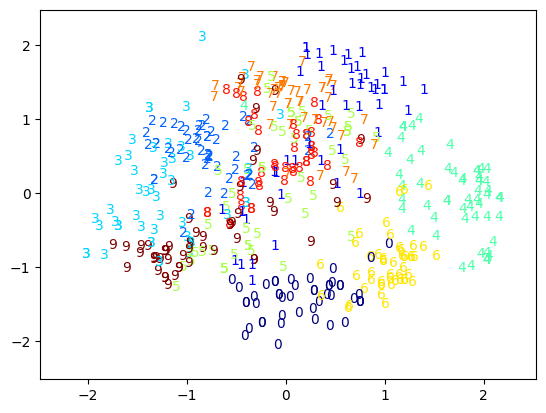

In [10]:
plot_digits(z_ml,digits_classes)

# EM algorithm for PCA

We now derive an altermative EM algorithm for the probabilistic PCA.
We start by introducing the complete log-likelihood (by incorporating the latent variable):
\begin{eqnarray*}
\mathcal{L}_C = \sum_{n=1}^N \ln p(x_n,z_n)
\end{eqnarray*}

We introduce the notation $\langle \cdot \rangle$ as the expectation with respect to $p(z|x)$. So that we have
\begin{eqnarray*}
\langle z_n \rangle &=& M^{-1}W^T(x_n-\mu)\\
\langle z_n z_n^T \rangle - \langle z_n \rangle \langle z_n \rangle^T &=& \text{cov}[z_n]\\
&=& \sigma^2 M^{-1}
\end{eqnarray*}
by the result of question 2 above.

We then define the expected log-likelihood $\langle \mathcal{L}_C \rangle$.

### Question 7 (Maths)

Show that
\begin{equation*}
\langle \mathcal{L}_C \rangle = \text{cst} -\sum_{n=1}^N \frac{d}{2}\ln\sigma^2 +\frac{\|x_n-\mu\|^2}{2\sigma^2}+\frac{1}{2}\text{tr}\langle z_nz_n^T \rangle + \frac{\text{tr}(W^TW\langle z_n z_n^T\rangle)}{2\sigma^2} - \frac{\langle z_n \rangle^TW^T(x_n-\mu)}{\sigma^2},
\end{equation*}
where cst does not depend on $\mu, W$ or $\sigma^2$.

Hint: check that $\langle \|z\|^2\rangle = \text{tr}(\langle z_nz_n^T \rangle)$.

We now derive the EM algorithm to estimate the parameters $W$ and $\sigma^2$. Indeed, we know that our best estimate for $\mu$ is $\overline{x} = \frac{1}{n}\sum x_n$, so that we set $\mu = \overline{x}$.

For the E-step, given our current parameters $W$ and $\sigma^2$, we compute:
\begin{eqnarray*}
\langle z_n \rangle &=& M^{-1}W^T(x_n-\mu)\\
\langle z_n z_n^T \rangle = \sigma^2 M^{-1} +\langle z_n \rangle \langle z_n \rangle^T,
\end{eqnarray*}
where $M=W^TW+ \sigma^2 I$.

For the M-step, we maximize $\langle \mathcal{L}_C \rangle$ given in question 7 with respect to $W$ and $\sigma^2$, so that we get (differentiating and setting the derivative to zero):
\begin{eqnarray*}
W_{\text{new}} &=& \left( \sum_n (x_n-\mu) \langle z_n \rangle ^T\right)\left( \sum_n \langle z_n z_n^T \rangle \right)^{-1}\\
\sigma^2_{\text{new}} &=& \frac{1}{Nd}\sum_n\left( \|x_n-\mu\|^2 - 2\langle z_n \rangle ^T W_{\text{new}}^T(x_n-\mu) + \text{tr}(\langle z_n z_n^T \rangle W_{\text{new}}^TW_{\text{new}})\right)
\end{eqnarray*}
(Not asked but if you want to check this formula you can have a look at [The Matrix Cookbook](https://www.math.uwaterloo.ca/~hwolkowi/matrixcookbook.pdf))

### Question 8 (Code)

Complete the code below to compute the parameters with the EM algorithm. The `transform` method should be the same as above.

Hint: I find [`np.einsum`](https://numpy.org/doc/stable/reference/generated/numpy.einsum.html) very useful

In [11]:
class PPCA_EM():
    def __init__(self, d=64, q=2, sigma2 = 0.1):
        self.q = q
        self.w = np.random.rand(d, q)
        self.sigma2 = sigma2
    
    def fit_em(self, x, max_iter = 25):
        self.x = x
        (d,n) = x.shape
        self.mu = np.mean(x,1, keepdims=True)
        for i in range(max_iter):
            # E-step
            m = self.w.T @ self.w + self.sigma2 * np.eye(self.q)
            m_inv = np.linalg.inv(m)
            mean_z = m_inv @ self.w.T @ (x-self.mu)
            cov_z = (self.sigma2 * m_inv)[:,:, np.newaxis] + np.einsum('in,jn->ijn', mean_z, mean_z)
            
            # M-step
            self.w = np.einsum('in,jn->ij', x-self.mu, mean_z) @ np.linalg.inv(np.sum(cov_z,-1))
            self.sigma2 = np.linalg.norm(x-self.mu)**2 -2*np.einsum('in,ji,jn->', mean_z, self.w, (x-self.mu))+np.einsum('ijn,kj,ki->', cov_z,self.w,self.w)
            self.sigma2 /= (n*d)
        pass
    
    def transform(self):
        m = (self.w).T @ self.w + self.sigma2 * np.eye(self.q)
        m_inv = np.linalg.inv(m)
        z = m_inv @ (self.w).T @ (self.x - self.mu)
        return z

In [12]:
ppca_em = PPCA_EM()
ppca_em.fit_em(digits_x)
z_em = ppca_em.transform() # shape of z should be (2,500)

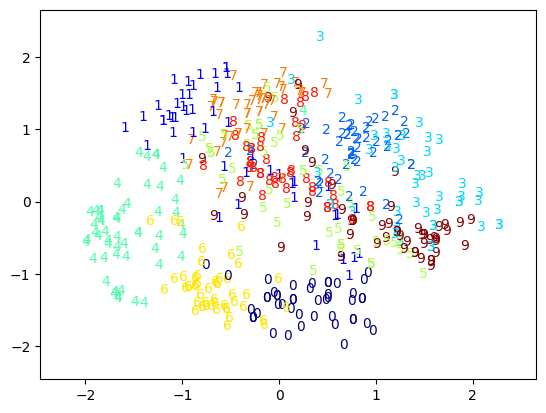

In [13]:
plot_digits(z_em,digits_classes)

### Question 9 (Maths)

Explain the result of the code given below

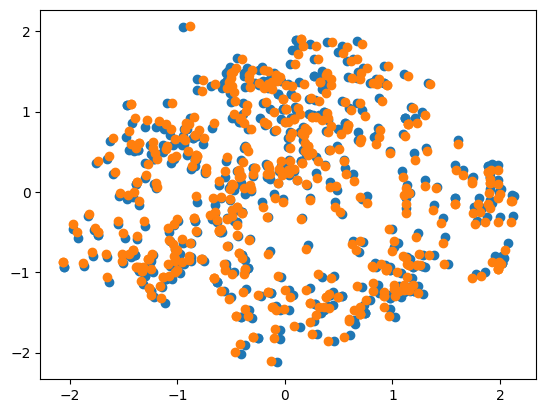

In [14]:
# do not modify this code
[u, s, v] = np.linalg.svd(z_em @ z_ml.T)
r = v @ u.T
z_em_r = r @ z_em
plt.scatter(z_em_r[0,:], z_em_r[1,:])
plt.scatter(z_ml[0,:], z_ml[1,:])

Here is a solution given by [Claude Sonnet 4 (23/05/2025)](https://claude.ai/public/artifacts/f081b56c-9263-4e60-ad17-b01033aaa042)